In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install scipy
!pip3 install matplotlib

In [2]:
import pandas as pd
import numpy as np

In [98]:
df1 = pd.read_csv('../processed_data/Ireland_Data.csv', encoding="utf8")
df2 = pd.read_csv('../processed_data/Fayetville_Data.csv', encoding="utf8")
df3 = pd.read_csv('../processed_data/Post-Fayetville_Data.csv', encoding="utf8")

In [99]:
dataframes = [df1, df2, df3]
combined = pd.concat(dataframes)

In [100]:
combined = combined.drop(['Unnamed: 0'], axis=1)

In [101]:
import ast
def string_to_floats(input_string):
    # Convert the string representation of the list to an actual list
    float_list = ast.literal_eval(input_string)
    # Ensure the result is a list of floats
    return [float(item) for item in float_list]

In [102]:
combined['Date'] = combined['Date'].astype(str)
combined['Exercise'] = combined['Exercise'].astype(str)
combined['Notes'] = combined['Notes'].astype(str)
combined['Mobility'] = combined['Mobility'].astype(str)

combined['Weights'] = combined['Weights'].apply(string_to_floats)
combined['Reps'] = combined['Reps'].apply(string_to_floats)

In [103]:
combined[combined['Exercise'] == 'come bench' ? combined[]] 

SyntaxError: invalid syntax (1272490390.py, line 1)

In [104]:
combined['Exercise'].unique()

array(['dips', 'tng bench', 'beltless high bar', 'comp bench',
       'pause beltless sumo deadlift', 'close grip bench',
       'beltless pause low bar squat', 'conventional beltless deadlift',
       'beltless pause sumo deadlift', 'incline dumbbell bench',
       'beltless pause sumo', 'beltless conventional deadlift',
       'beltless sumo deadlift', 'inverted rows',
       'incline dumbbell press', 'beltless low bar squat',
       'wide grip rdl', 'incline dumbbell flys', 'band face pulls',
       'alternating hammer curls', 'bulgarian split squats',
       'machine preacher curls', 'side lateral',
       'close grip tng sleeved bench', 'beltled sleeveless high bar',
       'face pulls', 'comp squat', 'comp deadlift', 'overhead press',
       'sitting calves', 'bent over rows', 'pause sumo belted deadlift',
       't bar row', 'belted pause sumo deadlift', 'hamstring curl',
       'stiff legged deadlift', '2sec pause bench', '2ct pause squats',
       'feet up bench', 'pause deadl

In [ ]:
def epleyE1rmCalc(weight, reps):
    return weight * (1 + 0.0333 * reps)
def landerE1rmCalc(weight, reps):
    return (100 * weight) / (101.3 - 2.67123 * reps)
def lombardiE1rmCalc(weight, reps):
    return weight * reps**0.1

C:\Users\Grant\AppData\Local\Temp\ipykernel_15196\918581327.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(dates)
C:\Users\Grant\AppData\Local\Temp\ipykernel_15196\918581327.py:73: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(dates, vals[i], s=100, edgecolor='k', marker=marker, color=color)


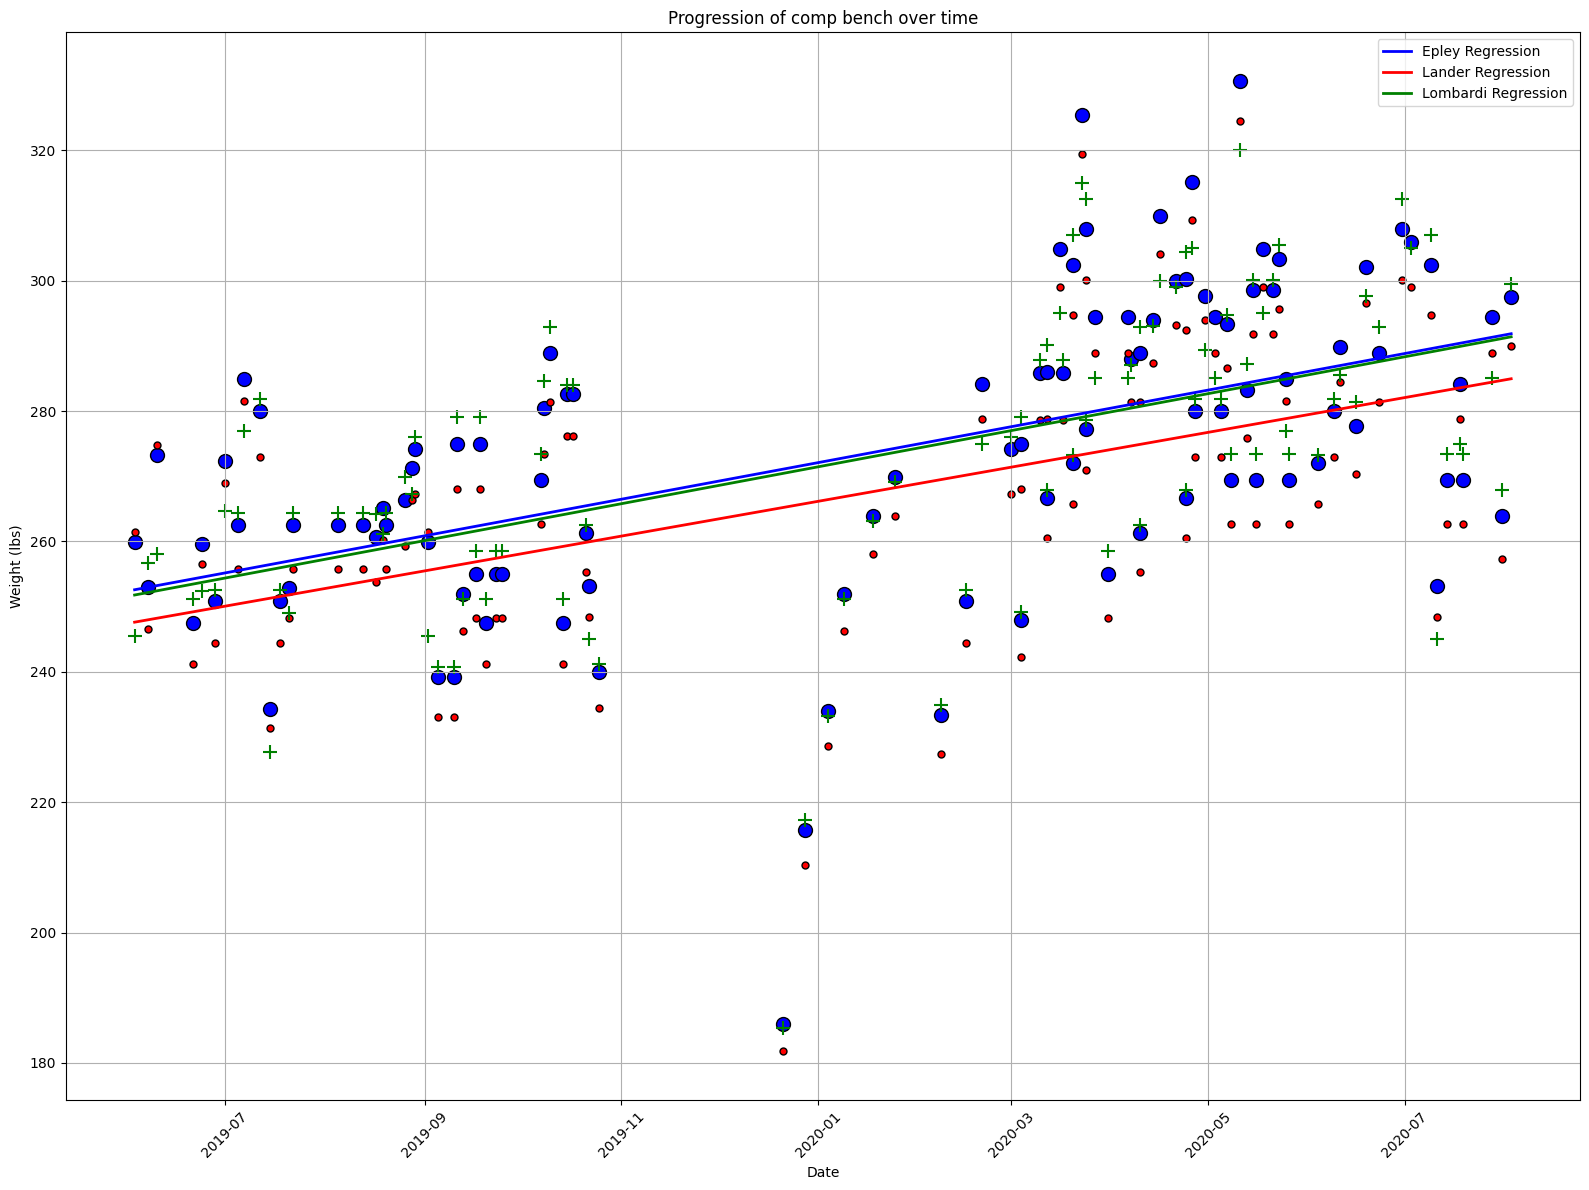

(<matplotlib.legend.Legend at 0x159eb47e3e0>, None, None)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

epleyE1rm = []
landerE1rm = []
lombardiE1rm = []

exercise = input()

# Filter the DataFrame for 'bench' related exercises, assuming all variations contain "comp bench"
df = combined[combined['Exercise'].str.contains(exercise, case=False, na=False)]

# Holds the date for each entered point
dates = []

# Iterate over dataframe
for index, row in df.iterrows():
    # Check each weight and corresponding rep count
    for weight, rep in zip(row['Weights'], row['Reps']):

        # Holds each possible E1rm
        epley_preds = []
        lander_preds = []
        lombardi_preds = []

        # Only valid entries
        if rep > 0 and weight > 0: 
            epley_preds.append(epleyE1rmCalc(weight, rep))
            lander_preds.append(landerE1rmCalc(weight, rep))
            lombardi_preds.append(lombardiE1rmCalc(weight, rep))

    # Holds only the highest E1rm for each day
    if(len(epley_preds) > 0):
        dates.append(row['Date'])
        epleyE1rm.append(max(epley_preds))
        landerE1rm.append(max(lander_preds))
        lombardiE1rm.append(max(lombardi_preds))

# Convert dates for plotting
dates = pd.to_datetime(dates)

# Convert dates to ordinal numbers for regression lines
date_nums = date2num(dates)  

# Holds regression lines for each calculation method
regression_lines = []

# Compute linear regression for Epley
slope, intercept = np.polyfit(date_nums, epleyE1rm, 1)
regression_lines.append(slope * date_nums + intercept)

# Compute linear regression for Lander
slope, intercept = np.polyfit(date_nums, landerE1rm, 1)
regression_lines.append(slope * date_nums + intercept)

# Compute linear regression for Lombardi
slope, intercept = np.polyfit(date_nums, lombardiE1rm, 1)
regression_lines.append(slope * date_nums + intercept)

# Preparing for plotting
vals = [epleyE1rm, landerE1rm, lombardiE1rm]
palette = ['b', 'r', 'g']
names = ['Epley Regression', 'Lander Regression', 'Lombardi Regression']
markers = ['o', '.', '+'] 

# Size of Plot
plt.figure(figsize=(16, 12))

# Plots points for each E1rm schema
for i, (color, name, marker) in enumerate(zip(palette, names, markers)):
    plt.scatter(dates, vals[i], s=100, edgecolor='k', marker=marker, color=color)

# Plots regression line for each E1rm schema
for (regression_line, name, color) in zip(regression_lines, names, palette):
    plt.plot(dates, regression_line, color=color, linewidth=2, label=name)

# Formatting
plt.title('Progression of {} over time'.format(exercise))
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.grid(True)
plt.xticks(rotation=45) 
plt.legend(), plt.tight_layout(), plt.show()

In [ ]:
combined.to_csv("../processed_data/Combined_Data.csv")